# ***Bank-Customer-Churn-Prediction***
**953621104060**

**Vishnu A**

# Packages Import

In [ ]:
pip install numpy

In [ ]:

pip install pandas

In [ ]:
pip install --upgrade pandas


In [1]:
pip install seaborn

In [2]:
pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 19.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=04d8774b84e693b10759e1826bd3dd8e42169c9b1fac6e20985b6c2df54516df
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling p

In [ ]:
# Imports
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
%matplotlib inline

# initializations
seaborn.set_theme()

# Reading the data

In [ ]:
path = "/content/Churn_Modelling.csv"
df = pd.read_csv(path)

In [ ]:
pip install --upgrade pandas


In [ ]:
df.head(15),

(    RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
 0           1    15634602  Hargrave          619    France  Female   42   
 1           2    15647311      Hill          608     Spain  Female   41   
 2           3    15619304      Onio          502    France  Female   42   
 3           4    15701354      Boni          699    France  Female   39   
 4           5    15737888  Mitchell          850     Spain  Female   43   
 5           6    15574012       Chu          645     Spain    Male   44   
 6           7    15592531  Bartlett          822    France    Male   50   
 7           8    15656148    Obinna          376   Germany  Female   29   
 8           9    15792365        He          501    France    Male   44   
 9          10    15592389        H?          684    France    Male   27   
 10         11    15767821    Bearce          528    France    Male   31   
 11         12    15737173   Andrews          497     Spain    Male   24   
 12         

In [ ]:
df.tail(15),

(      RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
 9985       9986    15586914       Nepean          659    France    Male   36   
 9986       9987    15581736     Bartlett          673   Germany    Male   47   
 9987       9988    15588839      Mancini          606     Spain    Male   30   
 9988       9989    15589329      Pirozzi          775    France    Male   30   
 9989       9990    15605622     McMillan          841     Spain    Male   28   
 9990       9991    15798964   Nkemakonam          714   Germany    Male   33   
 9991       9992    15769959  Ajuluchukwu          597    France  Female   53   
 9992       9993    15657105  Chukwualuka          726     Spain    Male   36   
 9993       9994    15569266       Rahman          644    France    Male   28   
 9994       9995    15719294         Wood          800    France  Female   29   
 9995       9996    15606229     Obijiaku          771    France    Male   39   
 9996       9997    15569892

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Basic Statistic

In [ ]:
df.describe(exclude="object").T,

(                   count          mean           std          min  \
 RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
 CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
 CreditScore      10000.0  6.505288e+02     96.653299       350.00   
 Age              10000.0  3.892180e+01     10.487806        18.00   
 Tenure           10000.0  5.012800e+00      2.892174         0.00   
 Balance          10000.0  7.648589e+04  62397.405202         0.00   
 NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
 HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
 IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
 EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
 Exited           10000.0  2.037000e-01      0.402769         0.00   
 
                          25%           50%           75%          max  
 RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
 CustomerId 

In [ ]:
df.describe(include="object"),

(       Surname Geography Gender
 count    10000     10000  10000
 unique    2932         3      2
 top      Smith    France   Male
 freq        32      5014   5457,)

## Unique values

In [ ]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

## Distribution

In [ ]:
pip install matplotlib

In [ ]:
!pip install matplotlib


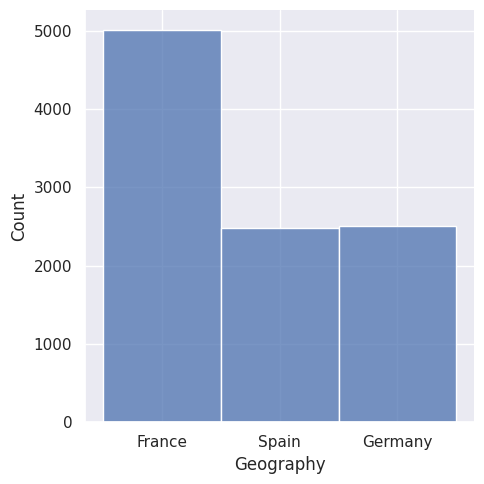

In [ ]:
seaborn.displot(data=df["Geography"])

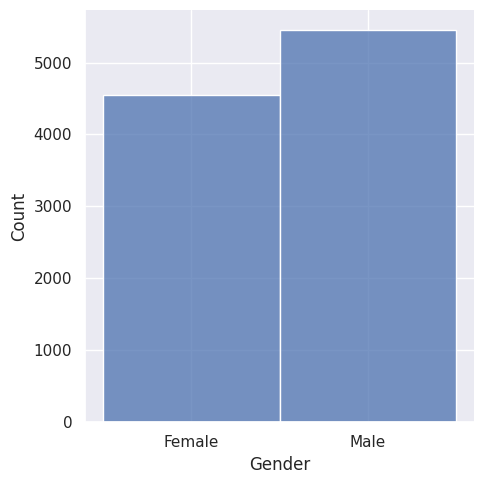

In [ ]:
seaborn.displot(df['Gender'])

In [ ]:
df.skew(numeric_only = True)

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## Handling Missing Values & Duplicates

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Dropping Unnecessary Columns

In [ ]:
df = df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)
shadow = df.copy()

In [ ]:
df.head(20),

(    RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
 0           1    15634602   Hargrave          619    France  Female   42   
 1           2    15647311       Hill          608     Spain  Female   41   
 2           3    15619304       Onio          502    France  Female   42   
 3           4    15701354       Boni          699    France  Female   39   
 4           5    15737888   Mitchell          850     Spain  Female   43   
 5           6    15574012        Chu          645     Spain    Male   44   
 6           7    15592531   Bartlett          822    France    Male   50   
 7           8    15656148     Obinna          376   Germany  Female   29   
 8           9    15792365         He          501    France    Male   44   
 9          10    15592389         H?          684    France    Male   27   
 10         11    15767821     Bearce          528    France    Male   31   
 11         12    15737173    Andrews          497     Spain    Male   24   

## Outliers and Boxplot

In [ ]:
df.shape

(10000, 11)

In [ ]:
list = df.columns.tolist()
list.remove("Geography")
list.remove("Age")
list.remove("Gender")
list

['CreditScore',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

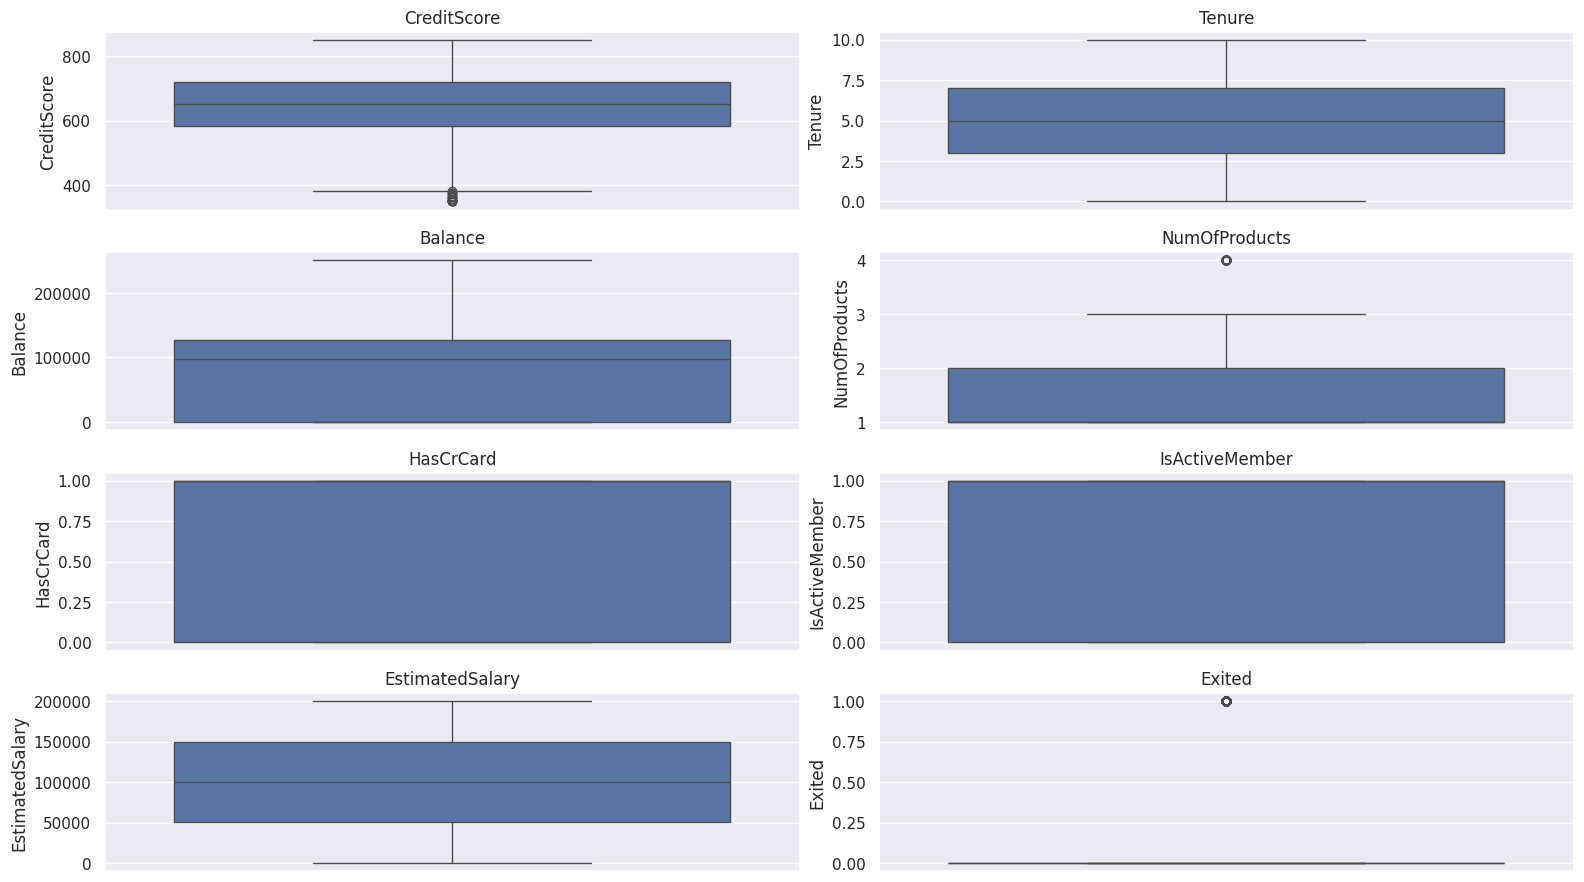

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16,9))
axs = axs.flatten()
for idx,column in enumerate(list):
    seaborn.boxplot(data=df[column], ax=axs[idx])
    axs[idx].set_title(column)
plt.tight_layout()

Not much of outliers are present. Only in credit score column, there are some very low values which makes sense cause low credit score is a normal phenomena. Also in NumOfProducts column, the outlier value is 4 which is also normal because a person can use multiple products from a bank if he/she deems it necessary. Other than these, there are not much outliers according to this boxplot illustration. So, moving on.

## Correlations

<Axes: >

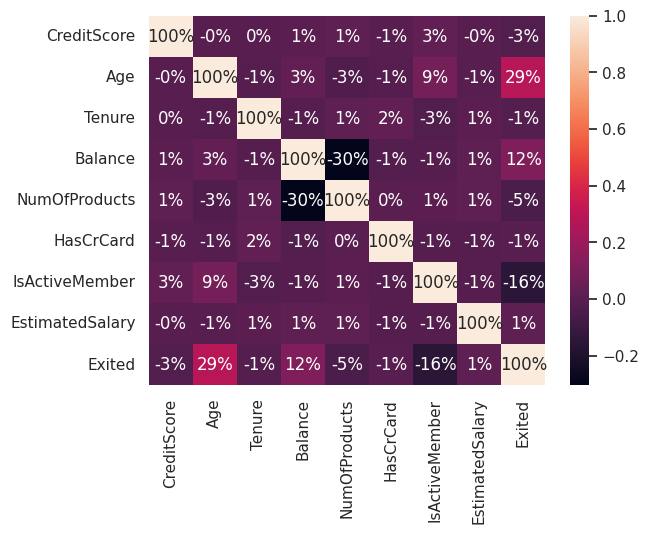

In [ ]:
corr = shadow.drop(['Gender', "Geography"], axis=1)
corr_matrix = corr.corr()
seaborn.heatmap(corr_matrix, annot=True, fmt=".0%")

# Encoding Necessary Features

In [ ]:
df = pd.get_dummies(data=df)

In [ ]:
df.head(20),

(    RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
 0           1    15634602   Hargrave          619    France  Female   42   
 1           2    15647311       Hill          608     Spain  Female   41   
 2           3    15619304       Onio          502    France  Female   42   
 3           4    15701354       Boni          699    France  Female   39   
 4           5    15737888   Mitchell          850     Spain  Female   43   
 5           6    15574012        Chu          645     Spain    Male   44   
 6           7    15592531   Bartlett          822    France    Male   50   
 7           8    15656148     Obinna          376   Germany  Female   29   
 8           9    15792365         He          501    France    Male   44   
 9          10    15592389         H?          684    France    Male   27   
 10         11    15767821     Bearce          528    France    Male   31   
 11         12    15737173    Andrews          497     Spain    Male   24   

# Model Training & Evaluation

In [ ]:
features = df.drop(["Exited"], axis=1)
label = df["Exited"]

In [ ]:
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=0)

## Model Training

In [ ]:
LR = LogisticRegression()
CT = DecisionTreeClassifier()
RF = RandomForestClassifier()

### Logistic Regression

In [ ]:
LR.fit(feature_train, label_train)

LogisticRegression()

In [ ]:
lr_prediction = LR.predict(feature_test)

In [ ]:
accuracy_score(label_test, lr_prediction) * 100

78.9

In [ ]:
print(classification_report(label_test, lr_prediction))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1595
           1       0.37      0.06      0.11       405

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.49      2000
weighted avg       0.72      0.79      0.72      2000



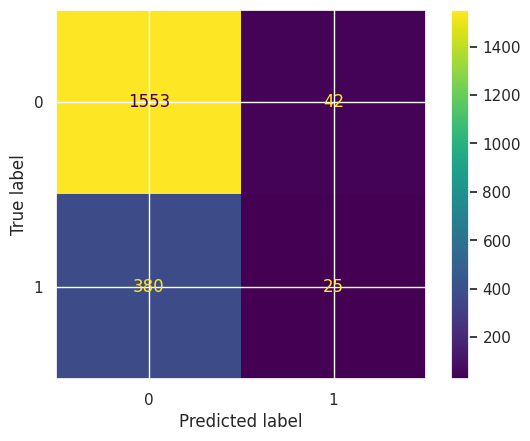

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(label_test, lr_prediction),display_labels=LR.classes_).plot()

In [ ]:
confusion_matrix(label_test, lr_prediction)

array([[1553,   42],
       [ 380,   25]])

### Decision Tree

In [ ]:
CT.fit(feature_train, label_train)

DecisionTreeClassifier()

In [ ]:
ct_prediction = CT.predict(feature_test)

In [ ]:
accuracy_score(label_test, ct_prediction) * 100

79.85

In [ ]:
print(classification_report(label_test, ct_prediction))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1595
           1       0.50      0.57      0.54       405

    accuracy                           0.80      2000
   macro avg       0.69      0.71      0.70      2000
weighted avg       0.81      0.80      0.80      2000



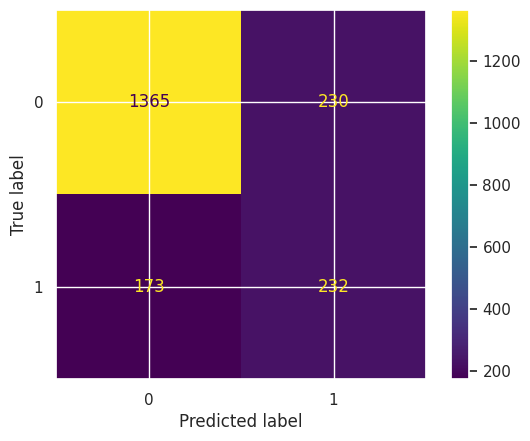

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(label_test, ct_prediction),display_labels=CT.classes_).plot()

### Random Forest

In [ ]:
RF.fit(feature_train, label_train)

RandomForestClassifier()

In [ ]:
rf_prediction = RF.predict(feature_test)

In [ ]:
accuracy_score(label_test, rf_prediction) * 100

87.05000000000001

In [ ]:
print(classification_report(label_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.77      0.52      0.62       405

    accuracy                           0.87      2000
   macro avg       0.83      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



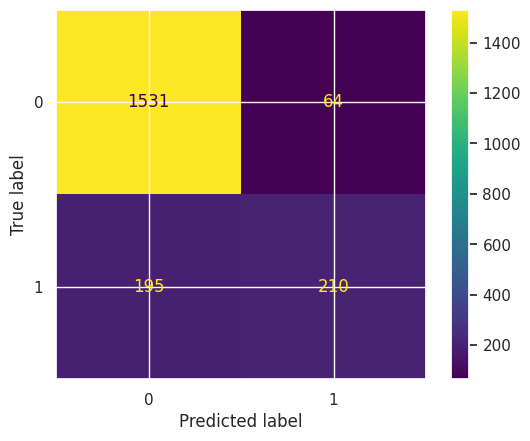

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(label_test, rf_prediction),display_labels=RF.classes_).plot()